# Importing Library

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import whois
import requests
import numpy as np
import ssl
import socket
import xgboost as xgb
import lightgbm as lgbm
from scipy.stats import pearsonr
from wordcloud import WordCloud
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Loading Dataset

In [62]:
data = pd.read_csv('dataset_phishing.csv')

In [63]:
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


Dropping url column

In [64]:
data.drop(columns=['url'],inplace=True)

In [65]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['status'] = encoder.fit_transform(data['status'])

In [66]:
data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


Checking negative number in every columns

In [67]:
def columns_with_negative_numbers(df):
    negative_cols = []
    for col in df.columns:
        if (df[col] < 0).any():
            negative_cols.append(col)
    return negative_cols

In [68]:
columns_with_negative_numbers(data)

['domain_registration_length', 'domain_age']

Removing negative number

In [69]:
data['domain_age'] = data['domain_age'].apply(lambda x: 0 if x < 0 else x)
data['domain_registration_length'] = data['domain_registration_length'].apply(lambda x: 0 if x < 0 else x)

In [70]:
data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,0,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,0,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


# Feature Engineering

## Remove Missing Value

Checking missing value

In [71]:
data.dropna(inplace=True)

## Feature Selection

In [72]:
copydf = data.copy()
copydf.drop(columns=['status'],inplace=True)
features = list(copydf.columns)
features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_or',
 'nb_eq',
 'nb_underscore',
 'nb_tilde',
 'nb_percent',
 'nb_slash',
 'nb_star',
 'nb_colon',
 'nb_comma',
 'nb_semicolumn',
 'nb_dollar',
 'nb_space',
 'nb_www',
 'nb_com',
 'nb_dslash',
 'http_in_path',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'punycode',
 'port',
 'tld_in_path',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'random_domain',
 'shortening_service',
 'path_extension',
 'nb_redirection',
 'nb_external_redirection',
 'length_words_raw',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'domain_in_brand',
 'brand_in_subdomain',
 'brand_in_path',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_extHyp

## Pearson Feature

In [73]:
Pearson_feature = []

for feature in features:
  correlation_coefficient,p_value = pearsonr(copydf[feature],data['status'])
  if abs(correlation_coefficient)>0.1 and p_value <0.05:
    print(f'{feature} :{correlation_coefficient}')
    Pearson_feature.append(feature)

length_url :0.24858046741991802
length_hostname :0.2383224037636864
ip :0.3216977823874188
nb_dots :0.20702877302594788
nb_hyphens :-0.1001074992268763
nb_at :0.14291456824951929
nb_qm :0.29431907084573083
nb_and :0.1705463753952214
nb_eq :0.23338630384578865
nb_slash :0.24226996017533764
nb_semicolumn :0.10355407191497229
nb_www :-0.4434676875128515
nb_com :0.15628353122693062
https_token :0.11466906528633782
ratio_digits_url :0.35639457016260356
ratio_digits_host :0.22433492719580964
tld_in_subdomain :0.20888415296656337
abnormal_subdomain :0.12815984230478442
nb_subdomains :0.11289072950967168
prefix_suffix :0.21468073790291944
shortening_service :0.10611999002964682
length_words_raw :0.1920104776096588
shortest_word_host :0.22308404240883128
longest_words_raw :0.20014657829049506
longest_word_host :0.12451556744481292
longest_word_path :0.21270911546421872
avg_words_raw :0.16756371369746192
avg_word_host :0.19350165239605488
avg_word_path :0.19725610911780225
phish_hints :0.3353927

C:\Users\usern\AppData\Local\Temp\ipykernel_17156\1159571877.py:4: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_coefficient,p_value = pearsonr(copydf[feature],data['status'])


In [74]:
print(len(Pearson_feature))

48


## Chi Square Feature

In [75]:
from sklearn.feature_selection import chi2

x_chi = data.drop(columns=['status'])
y_chi = data['status']

chi_scores = chi2(x_chi,y_chi)

p_values = pd.Series(chi_scores[1], index=x_chi.columns, name='p_value')
chi_values = pd.Series(chi_scores[0], index=x_chi.columns, name='chi_value')

df_chi = pd.DataFrame({'chi_value': chi_values, 'p_value': p_values})

df_chi = df_chi.sort_values(by=['chi_value', 'p_value'], ascending=[False, True])

In [76]:
Chi_feature = df_chi.iloc[:48]

In [77]:
Chi_feature

,chi_value,p_value
web_traffic,1.937304e+08,0.000000e+00
domain_age,2.992730e+06,0.000000e+00
nb_hyperlinks,4.279212e+05,0.000000e+00
domain_registration_length,4.028754e+05,0.000000e+00
length_url,3.532804e+04,0.000000e+00
longest_word_path,2.607634e+04,0.000000e+00
ratio_intMedia,2.131494e+04,0.000000e+00
longest_words_raw,1.450434e+04,0.000000e+00
ratio_extMedia,1.428797e+04,0.000000e+00
safe_anchor,1.415479e+04,0.000000e+00


In [78]:
Chi_feature = Chi_feature.index.tolist()

In [79]:
Chi_feature

['web_traffic',
 'domain_age',
 'nb_hyperlinks',
 'domain_registration_length',
 'length_url',
 'longest_word_path',
 'ratio_intMedia',
 'longest_words_raw',
 'ratio_extMedia',
 'safe_anchor',
 'links_in_tags',
 'page_rank',
 'avg_word_path',
 'length_hostname',
 'google_index',
 'phish_hints',
 'nb_eq',
 'length_words_raw',
 'shortest_word_host',
 'nb_and',
 'nb_www',
 'ip',
 'nb_qm',
 'nb_extCSS',
 'avg_words_raw',
 'avg_word_host',
 'nb_semicolumn',
 'nb_slash',
 'nb_hyphens',
 'tld_in_subdomain',
 'statistical_report',
 'empty_title',
 'prefix_suffix',
 'longest_word_host',
 'nb_dots',
 'nb_com',
 'domain_in_title',
 'nb_at',
 'shortest_word_path',
 'ratio_digits_url',
 'ratio_digits_host',
 'domain_with_copyright',
 'abnormal_subdomain',
 'dns_record',
 'ratio_intHyperlinks',
 'nb_percent',
 'external_favicon',
 'suspecious_tld']

In [80]:
print(len(Chi_feature))

48


## Random Forest Most Importance Feature

In [81]:
x_rf = data.drop(columns=['status'])
y_rf = data['status']
RF = RandomForestClassifier(random_state=42)
RF.fit(x_rf,y_rf)
importances = RF.feature_importances_
feature_names = x_rf.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.iloc[:48])

                       Feature  Importance
85                google_index    0.180290
86                   page_rank    0.098290
56               nb_hyperlinks    0.088865
83                 web_traffic    0.074086
82                  domain_age    0.037595
20                      nb_www    0.036947
50                 phish_hints    0.030019
57         ratio_intHyperlinks    0.028198
58         ratio_extHyperlinks    0.024172
46           longest_word_path    0.023974
74                 safe_anchor    0.023862
25            ratio_digits_url    0.019610
62        ratio_extRedirection    0.018172
0                   length_url    0.016453
44           longest_words_raw    0.015590
49               avg_word_path    0.015578
40                 char_repeat    0.014851
39            length_words_raw    0.014003
78             domain_in_title    0.013948
1              length_hostname    0.013727
42          shortest_word_host    0.013535
67               links_in_tags    0.013003
81  domain_

In [129]:
RF_feature = list(feature_importance_df.iloc[:48]['Feature'])

In [130]:
len(RF_feature)

48

In [83]:
Pearson_feature.append('status')
Pearson_data = data[Pearson_feature].copy()
Chi_feature.append('status')
Chi_data = data[Chi_feature].copy()
RF_feature.append('status')
RF_data = data[RF_feature].copy()

## Splitting dataset into train set and test set

In [84]:
x_Pearson = Pearson_data.drop(columns=['status'])
y_Pearson = Pearson_data['status']
x_train_Pearson,x_test_Pearson,y_train_Pearson,y_test_Pearson = train_test_split(x_Pearson,y_Pearson,random_state=42,test_size=0.3)

x_Chi = Chi_data.drop(columns=['status'])
y_Chi = Chi_data['status']
x_train_Chi,x_test_Chi,y_train_Chi,y_test_Chi = train_test_split(x_Chi,y_Chi,random_state=42,test_size=0.3)

x_RF = RF_data.drop(columns=['status'])
y_RF = RF_data['status']
x_train_RF,x_test_RF,y_train_RF,y_test_RF = train_test_split(x_RF,y_RF,random_state=42,test_size=0.3)



# Modeling

## Random Forest Classifier

### Pearson

In [85]:
RF_Pearson = RandomForestClassifier()
RF_Pearson.fit(x_train_Pearson,y_train_Pearson)
print(RF_Pearson.score(x_train_Pearson,y_train_Pearson))
RF_Pearson_pred = RF_Pearson.predict(x_test_Pearson)

1.0


In [86]:
print(classification_report(y_test_Pearson,RF_Pearson_pred,target_names=['benign','phishing']))

              precision    recall  f1-score   support

      benign       0.96      0.97      0.97      1732
    phishing       0.97      0.96      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



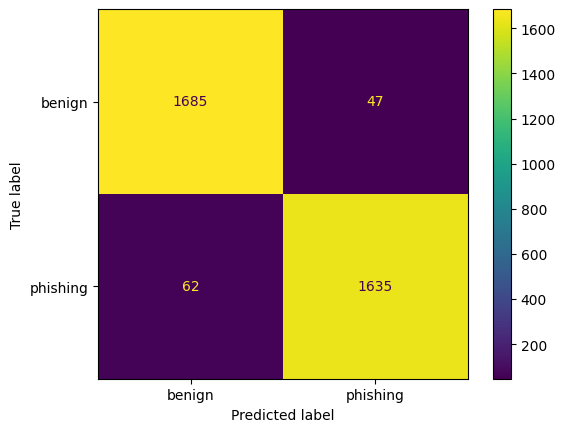

In [87]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_Pearson,RF_Pearson_pred),display_labels=['benign','phishing'])
Display.plot()

### Chi Square

In [88]:
RF_Chi = RandomForestClassifier()
RF_Chi.fit(x_train_Chi,y_train_Chi)
print(RF_Chi.score(x_train_Chi,y_train_Chi))
RF_Chi_pred = RF_Chi.predict(x_test_Chi)

1.0


In [89]:
print(classification_report(y_test_Chi,RF_Chi_pred,target_names=['benign','phishing']))

              precision    recall  f1-score   support

      benign       0.96      0.96      0.96      1732
    phishing       0.96      0.96      0.96      1697

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429



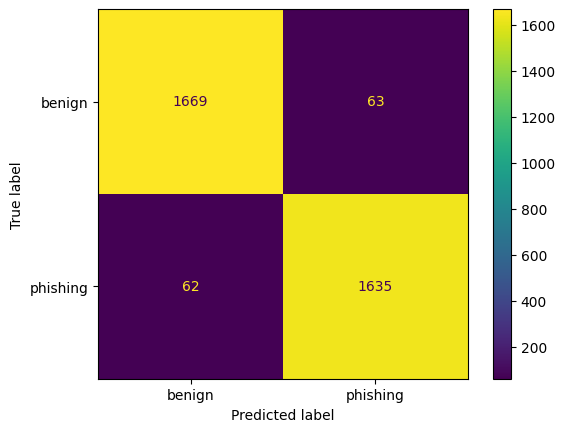

In [90]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_Chi,RF_Chi_pred),display_labels=['benign','phishing'])
Display.plot()

### Random Forest Feature

In [91]:
RF_RF = RandomForestClassifier()
RF_RF.fit(x_train_RF,y_train_RF)
print(RF_RF.score(x_train_RF,y_train_RF))
RF_RF_pred = RF_RF.predict(x_test_RF)

1.0


In [92]:
print(classification_report(y_test_RF,RF_RF_pred,target_names=['benign','phishing']))

              precision    recall  f1-score   support

      benign       0.96      0.97      0.97      1732
    phishing       0.97      0.96      0.96      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



## XGBoost

### Pearson

In [93]:
XGB_Pearson = xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='aucpr',early_stopping_rounds=10)
XGB_Pearson.fit(x_train_Pearson,y_train_Pearson,verbose=True,eval_set=[(x_test_Pearson,y_test_Pearson)])

[0]	validation_0-aucpr:0.97515
[1]	validation_0-aucpr:0.97716
[2]	validation_0-aucpr:0.98075
[3]	validation_0-aucpr:0.98389
[4]	validation_0-aucpr:0.98502
[5]	validation_0-aucpr:0.98575
[6]	validation_0-aucpr:0.98793
[7]	validation_0-aucpr:0.98783
[8]	validation_0-aucpr:0.98606
[9]	validation_0-aucpr:0.98617
[10]	validation_0-aucpr:0.98814
[11]	validation_0-aucpr:0.98880
[12]	validation_0-aucpr:0.98879
[13]	validation_0-aucpr:0.99127
[14]	validation_0-aucpr:0.99132
[15]	validation_0-aucpr:0.99164
[16]	validation_0-aucpr:0.99197
[17]	validation_0-aucpr:0.99158
[18]	validation_0-aucpr:0.99152
[19]	validation_0-aucpr:0.99175
[20]	validation_0-aucpr:0.99168
[21]	validation_0-aucpr:0.99276
[22]	validation_0-aucpr:0.99270
[23]	validation_0-aucpr:0.99266
[24]	validation_0-aucpr:0.99172
[25]	validation_0-aucpr:0.99336
[26]	validation_0-aucpr:0.99347
[27]	validation_0-aucpr:0.99338
[28]	validation_0-aucpr:0.99340
[29]	validation_0-aucpr:0.99322
[30]	validation_0-aucpr:0.99376
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
print(XGB_Pearson.score(x_train_Pearson,y_train_Pearson))

1.0


In [95]:
XGB_Pearson_pred = XGB_Pearson.predict(x_test_Pearson)

In [96]:
print(classification_report(y_test_Pearson,XGB_Pearson_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1732
           1       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



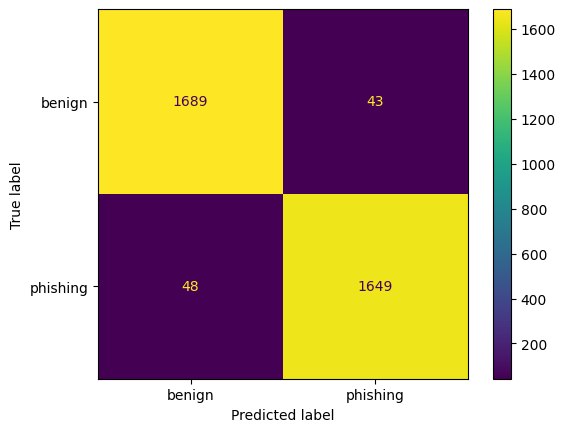

In [97]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_Pearson,XGB_Pearson_pred),display_labels=['benign','phishing'])
Display.plot()

### Chi Square

In [98]:
XGB_Chi = xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='aucpr',early_stopping_rounds=10)
XGB_Chi.fit(x_train_Chi,y_train_Chi,verbose=True,eval_set=[(x_test_Chi,y_test_Chi)])

[0]	validation_0-aucpr:0.97413
[1]	validation_0-aucpr:0.97658
[2]	validation_0-aucpr:0.97954
[3]	validation_0-aucpr:0.98359
[4]	validation_0-aucpr:0.98421
[5]	validation_0-aucpr:0.98595
[6]	validation_0-aucpr:0.98726
[7]	validation_0-aucpr:0.98841
[8]	validation_0-aucpr:0.98895
[9]	validation_0-aucpr:0.99045
[10]	validation_0-aucpr:0.99104
[11]	validation_0-aucpr:0.99144
[12]	validation_0-aucpr:0.99192
[13]	validation_0-aucpr:0.99207
[14]	validation_0-aucpr:0.99279
[15]	validation_0-aucpr:0.99304
[16]	validation_0-aucpr:0.99341
[17]	validation_0-aucpr:0.99348
[18]	validation_0-aucpr:0.99361
[19]	validation_0-aucpr:0.99362
[20]	validation_0-aucpr:0.99363
[21]	validation_0-aucpr:0.99371
[22]	validation_0-aucpr:0.99389
[23]	validation_0-aucpr:0.99396
[24]	validation_0-aucpr:0.99412
[25]	validation_0-aucpr:0.99423
[26]	validation_0-aucpr:0.99425
[27]	validation_0-aucpr:0.99425
[28]	validation_0-aucpr:0.99427
[29]	validation_0-aucpr:0.99447
[30]	validation_0-aucpr:0.99457
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
print(XGB_Chi.score(x_train_Chi,y_train_Chi))

0.9922509686289214


In [100]:
XGB_Chi_pred = XGB_Chi.predict(x_test_Chi)

In [101]:
print(classification_report(y_test_Chi,XGB_Chi_pred,target_names=['benign','phishing']))

              precision    recall  f1-score   support

      benign       0.97      0.97      0.97      1732
    phishing       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



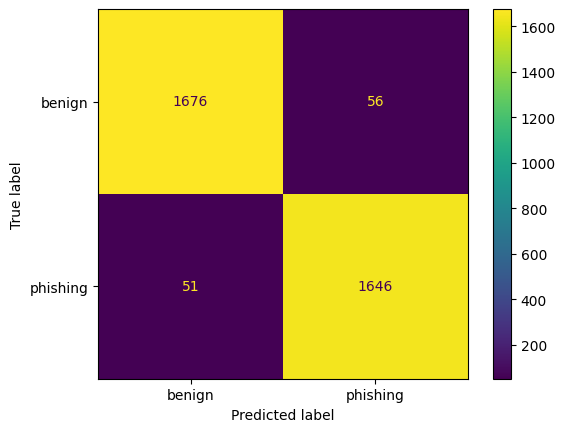

In [102]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_Chi,XGB_Chi_pred),display_labels=['benign','phishing'])
Display.plot()

### Random Forest Feature

In [103]:
XGB_RF = xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='aucpr',early_stopping_rounds=10)
XGB_RF.fit(x_train_RF,y_train_RF,verbose=True,eval_set=[(x_test_RF,y_test_RF)])

[0]	validation_0-aucpr:0.96394
[1]	validation_0-aucpr:0.97646
[2]	validation_0-aucpr:0.98192
[3]	validation_0-aucpr:0.98284
[4]	validation_0-aucpr:0.98517
[5]	validation_0-aucpr:0.98599
[6]	validation_0-aucpr:0.98716
[7]	validation_0-aucpr:0.98908
[8]	validation_0-aucpr:0.98978
[9]	validation_0-aucpr:0.99006
[10]	validation_0-aucpr:0.99032
[11]	validation_0-aucpr:0.99176
[12]	validation_0-aucpr:0.99232
[13]	validation_0-aucpr:0.99238
[14]	validation_0-aucpr:0.99263
[15]	validation_0-aucpr:0.99272
[16]	validation_0-aucpr:0.99286
[17]	validation_0-aucpr:0.99317
[18]	validation_0-aucpr:0.99331
[19]	validation_0-aucpr:0.99352
[20]	validation_0-aucpr:0.99398
[21]	validation_0-aucpr:0.99410
[22]	validation_0-aucpr:0.99427
[23]	validation_0-aucpr:0.99419
[24]	validation_0-aucpr:0.99441
[25]	validation_0-aucpr:0.99467
[26]	validation_0-aucpr:0.99470
[27]	validation_0-aucpr:0.99474
[28]	validation_0-aucpr:0.99484
[29]	validation_0-aucpr:0.99498
[30]	validation_0-aucpr:0.99498
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
print(XGB_RF.score(x_train_RF,y_train_RF))

0.9998750156230471


In [105]:
XGB_RF_pred = XGB_RF.predict(x_test_RF)

In [106]:
print(classification_report(y_test_RF,XGB_RF_pred,target_names=['benign','phishing']))

              precision    recall  f1-score   support

      benign       0.97      0.97      0.97      1732
    phishing       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



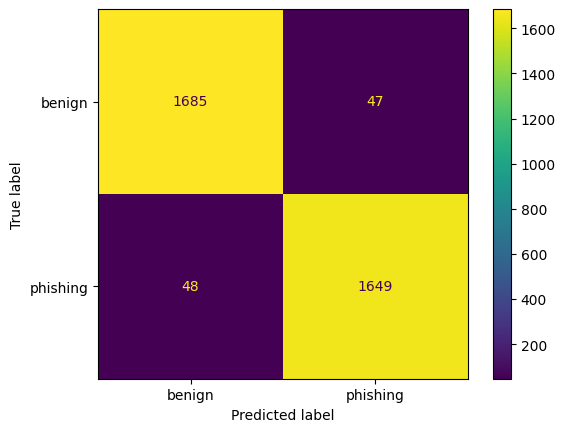

In [107]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_RF,XGB_RF_pred),display_labels=['benign','phishing'])
Display.plot()

## LightGBM

### Pearson Feature

In [108]:
LGBM_Pearson = lgbm.LGBMClassifier()
LGBM_Pearson.fit(x_train_Pearson,y_train_Pearson,eval_set=[(x_test_Pearson,y_test_Pearson)])

[LightGBM] [Info] Number of positive: 4018, number of negative: 3983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3913
[LightGBM] [Info] Number of data points in the train set: 8001, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502187 -> initscore=0.008749
[LightGBM] [Info] Start training from score 0.008749


LGBMClassifier()

In [109]:
LGBM_Pearson.score(x_train_Pearson,y_train_Pearson)

0.9971253593300837

In [110]:
LGBM_Pearson_pred = LGBM_Pearson.predict(x_test_Pearson)

In [111]:
print(classification_report(y_test_Pearson,LGBM_Pearson_pred,target_names=['benign','phishing']))

              precision    recall  f1-score   support

      benign       0.97      0.98      0.97      1732
    phishing       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



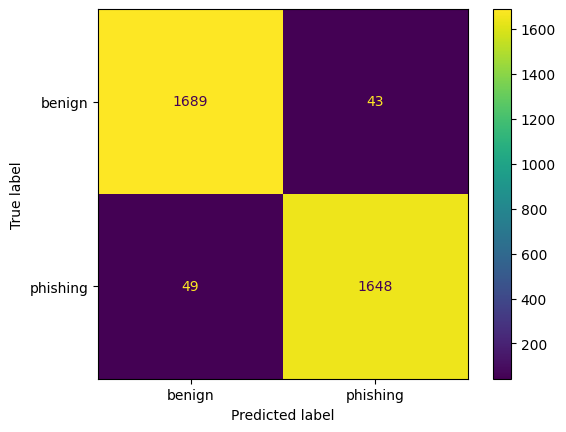

In [112]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_Pearson,LGBM_Pearson_pred),display_labels=['benign','phishing'])
Display.plot()

### Chi Square

In [113]:
LGBM_Chi = lgbm.LGBMClassifier()
LGBM_Chi.fit(x_train_Chi,y_train_Chi,eval_set=[(x_test_Chi,y_test_Chi)])

[LightGBM] [Info] Number of positive: 4018, number of negative: 3983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3976
[LightGBM] [Info] Number of data points in the train set: 8001, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502187 -> initscore=0.008749
[LightGBM] [Info] Start training from score 0.008749


LGBMClassifier()

In [114]:
LGBM_Chi_pred = LGBM_Chi.predict(x_test_Chi)

In [115]:
print(classification_report(y_test_Chi,LGBM_Chi_pred,target_names=['benign','phishing']))

              precision    recall  f1-score   support

      benign       0.97      0.97      0.97      1732
    phishing       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



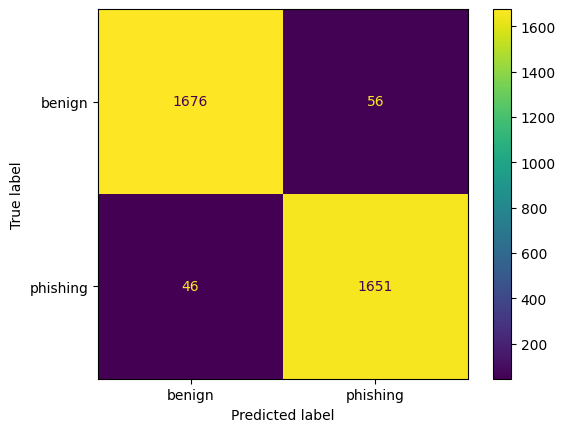

In [116]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_Chi,LGBM_Chi_pred),display_labels=['benign','phishing'])
Display.plot()

### Random Forest Feature

In [117]:
LGBM_RF = lgbm.LGBMClassifier()
LGBM_RF.fit(x_train_RF,y_train_RF,eval_set=[(x_test_RF,y_test_RF)])

[LightGBM] [Info] Number of positive: 4018, number of negative: 3983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4748
[LightGBM] [Info] Number of data points in the train set: 8001, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502187 -> initscore=0.008749
[LightGBM] [Info] Start training from score 0.008749


LGBMClassifier()

In [118]:
LGBM_RF_pred = LGBM_RF.predict(x_test_RF)

In [119]:
print(classification_report(y_test_RF,LGBM_RF_pred,target_names=['benign','phishing']))

              precision    recall  f1-score   support

      benign       0.97      0.97      0.97      1732
    phishing       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



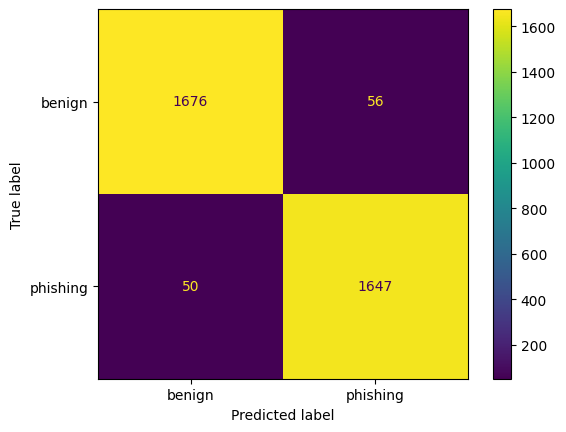

In [120]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_RF,LGBM_RF_pred),display_labels=['benign','phishing'])
Display.plot()